<a href="https://colab.research.google.com/github/ChristosBellos/CustomerChurnPrediction/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importing the dependencies**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading and Understanding**

In [5]:
#load the csv data to a panda dataframe
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
#see the number of columns and rows
df.shape

(7043, 21)

In [7]:
#see the first 5 rows of each variable
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
pd.set_option("display.max_columns", None)

In [9]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
#info about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# dropping customerID column as this is not required for modeling
df = df.drop(columns=["customerID"])

In [12]:
#verify
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
# if we want to see all the values of a categorical variable
print(df["gender"].unique())

['Female' 'Male']


# printing the unique values in all the categorical columns

numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

In [14]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [15]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [16]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
len(df[df["TotalCharges"]==" "])

11

In [18]:
#in order to not have an error when converting TotalCharges from factor to float
#change all the empty values with 0, firstly in string form
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [19]:
#then change type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [21]:
#checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No missing values in dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target


**3. Exploratory Data Analysis (EDA)**

In [22]:
df.shape

(7043, 20)

In [23]:
#show statistical measures
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features Analysis**

Understand the distribution of numerical features

In [24]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_means = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_means, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

  #

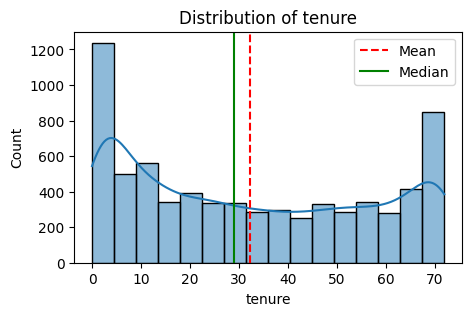

In [25]:
plot_histogram(df, "tenure")

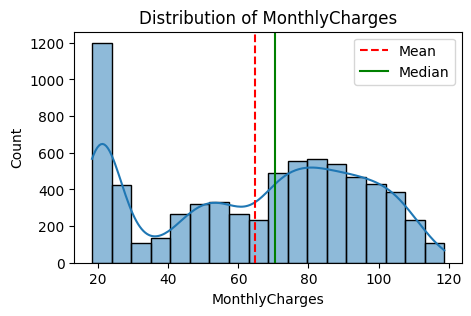

In [26]:
plot_histogram(df, "MonthlyCharges")

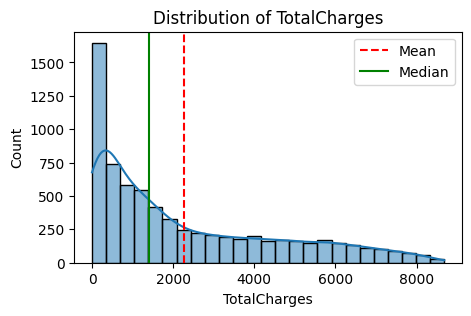

In [27]:
plot_histogram(df, "TotalCharges")

**Box Plot For Numerical Features**

In [28]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(5, 3))
  sns.boxplot(x=df[column_name])
  plt.title(f"Boxplot of {column_name}")
  plt.ylabel(column_name)
  plt.show

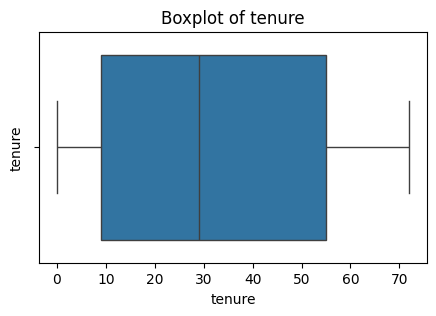

In [29]:
plot_boxplot(df, "tenure")

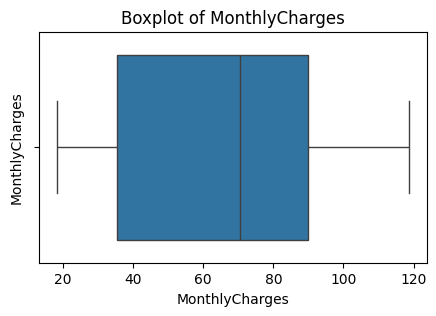

In [30]:
plot_boxplot(df, "MonthlyCharges")

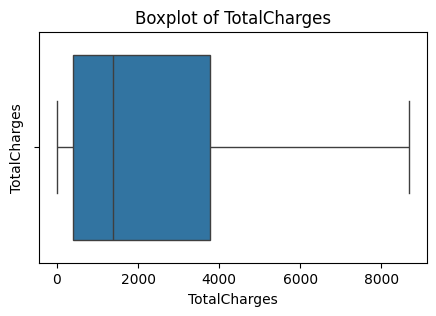

In [31]:
plot_boxplot(df, "TotalCharges")

**Correlation Heatmap for Numerical Columns**

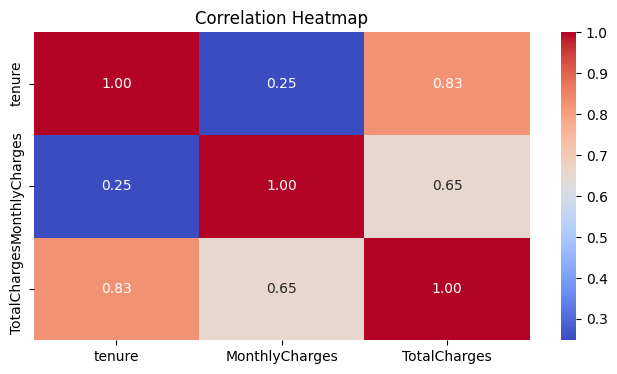

In [32]:
#correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorial Features Analysis**

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Countplot for Categorical Columns**

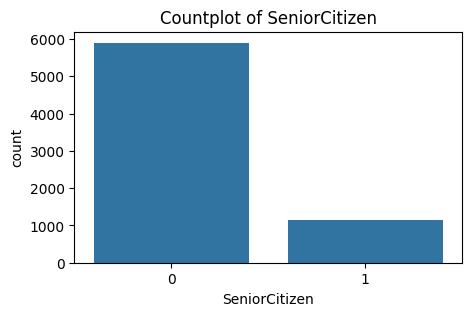

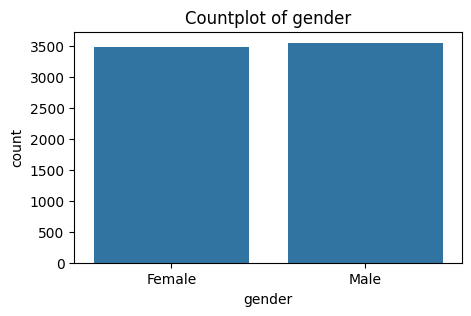

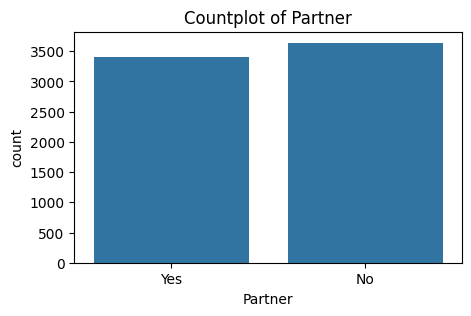

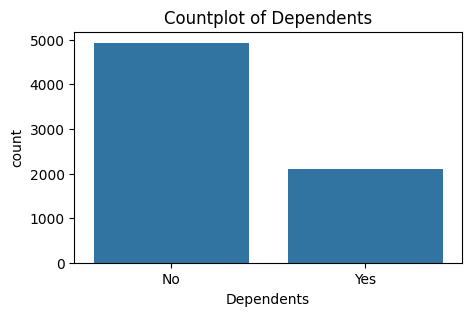

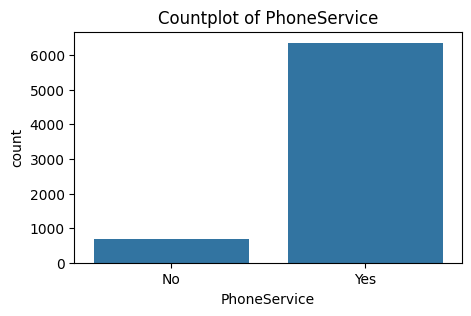

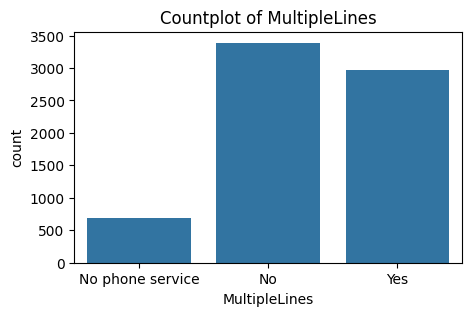

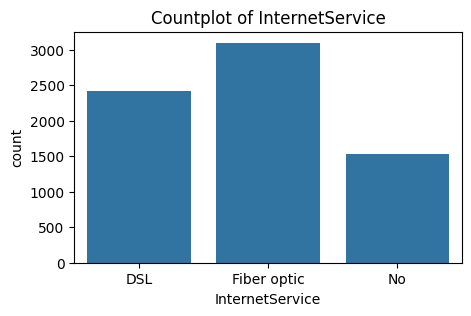

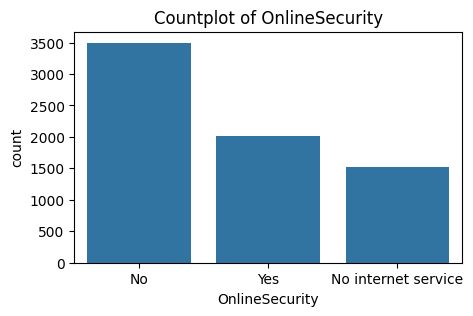

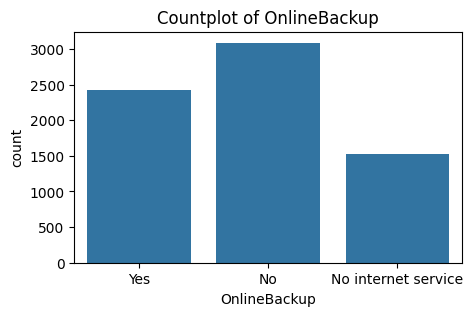

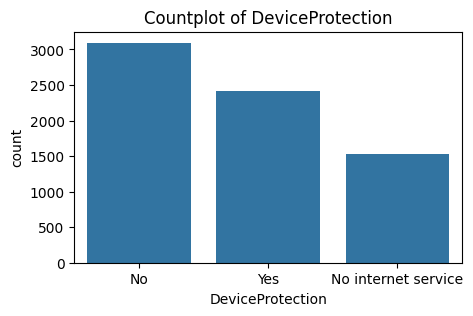

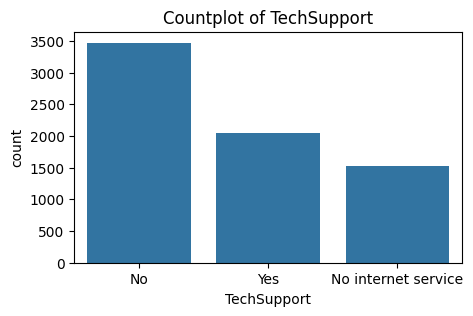

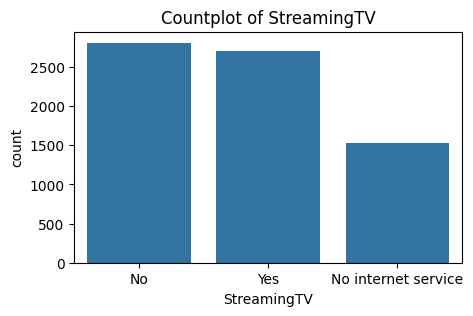

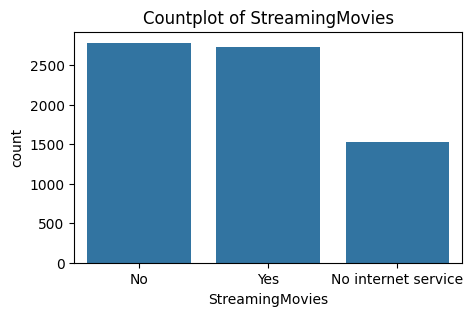

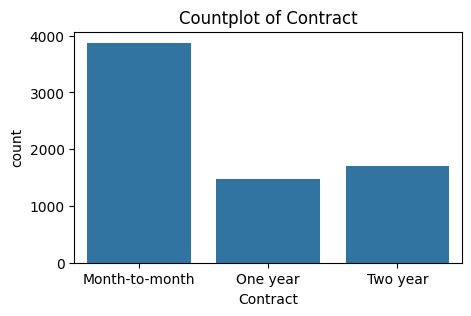

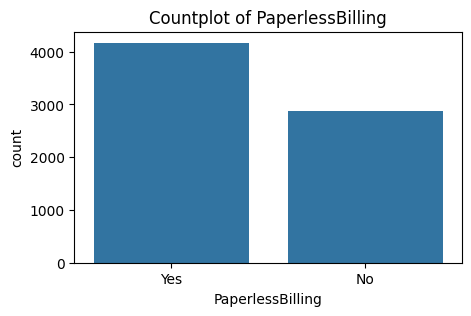

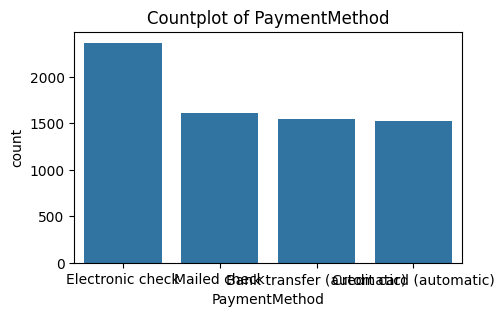

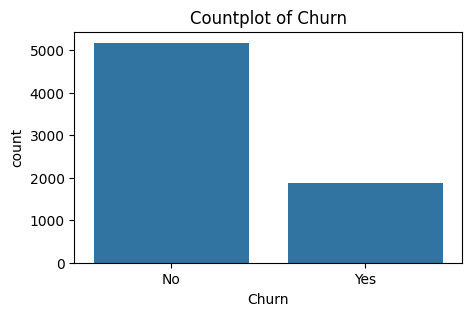

In [35]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Countplot of {col}")
  plt.show()

**4. Data Processing**

In [36]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Label encoding of target column

In [37]:
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

/tmp/ipython-input-3085587267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})


In [38]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [39]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [40]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [41]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [42]:
# initialize a dictionary to save the encoders
encoders = {}

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

#we do this process because when we are transforming data, we have to transform
#them under the same label encoder (some have 0 & 1 values, others yes & no)
#for each column, it takes the variable, it transforms the values (and generally updates the encoder) and saves it in out dictionary


In [43]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [44]:
#now the values have changed
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Training and Test Data Split**

In [45]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [46]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [47]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [48]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(y_train.shape)

(5634,)


In [50]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling Technique (SMOTE)

In [51]:
smote = SMOTE(random_state=42)

In [52]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [53]:
# now we are going to work on the updated smote data
print(y_train_smote.shape)

(8276,)


In [54]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

In [55]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBRFClassifier(random_state=42)
}

In [56]:
# dictionary to store the cross validation results
cv_scores = {}

# perform S-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.81
----------------------------------------------------------------------


In [57]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.71799517, 0.77220544, 0.85498489, 0.83987915, 0.85135952])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [58]:
rfc = RandomForestClassifier(random_state=42)

In [59]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [60]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


**6. Model Evaluation**

In [61]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report\n", classification_report(y_test, y_test_pred))

Accuracy Score
 0.7785663591199432
Confusion Matrix
 [[878 158]
 [154 219]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [62]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names":X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**7. Load the saved model and build a Predictive System**

In [63]:
# load thhe saved model and the encoders

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [64]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [65]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [66]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

print(input_data_df.head())

# encode categorical features using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

#make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(f"Prediction: {'Churn' if prediction[0]==1 else 'No Churn'}")
print(f"Prediction Probability: {pred_prob}")

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
Prediction: No Churn
Prediction Probability: [[0.78 0.22]]


In [67]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**To do:**
1. Implement Hyperparameter Tuning
2. Try Model Selection
3. Try downsampling
4. Try to address the overfitting
5. Try startified k fold CV


**Try Hyperparameter Tuning on the Initial Dataframe**

In [68]:
# import the proper libraries
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score, roc_auc_score

In [69]:
# ελέγχω αν λειτουργούν ακόμα τα splits που έχω φτιάξει
X_train.shape

(5634, 19)

In [70]:
X_test.shape

(1409, 19)

In [71]:
y_train.shape

(5634,)

In [72]:
y_test.shape

(1409,)

In [73]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


**Εφαρμόζουμε μετά GridSearchCV με Cross-Validation**

ΌΧΙ ΤΏΡΑ SMOTE

In [74]:
# πρώτα cross validation & υπολογισμός scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": make_scorer(roc_auc_score)
}

1. Ταξινομητής Decision Tree

In [75]:
pipe_dt = Pipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

parameter_grid_dt = {
    "smote__k_neighbors": [3,5],
    "classifier__criterion": ["gini", "entropy", "log_loss"],
    "classifier__max_depth": [None, 5, 10, 20],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__class_weight": [None, "balanced"]
}

grid_dt = GridSearchCV(pipe_dt, parameter_grid_dt, cv=cv, scoring=scoring, refit="f1", n_jobs=-1, verbose=1)
grid_dt.fit(X_train, y_train)

print("Decision Tree recall:", grid_dt.best_score_)
print("Decision Tree best parameters:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Decision Tree recall: 0.5981763696774051
Decision Tree best parameters: {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'smote__k_neighbors': 5}


In [76]:
# πρόβλεψη βάσει του test set
y_pred = best_dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7544357700496807
Confusion matrix:
 [[794 242]
 [104 269]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1036
           1       0.53      0.72      0.61       373

    accuracy                           0.75      1409
   macro avg       0.71      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



Το accuracy με το GridSearchCV έγινε χειρότερο. Μάλλον έχω κάνει κάτι λάθος.

**GridSearchCV με RandomForestClassifier**

In [77]:
pipe_rf = Pipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

parameter_grid_rf = {
    "smote__k_neighbors": [5],
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
    "classifier__max_features": ["sqrt"],
    "classifier__class_weight": [None, "balanced_subsample"]
}

grid_rf = GridSearchCV(pipe_rf, parameter_grid_rf, cv=cv, scoring=scoring, refit="f1", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("Random Forest recall:", grid_rf.best_score_)
print("Random Forest best params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest recall: 0.6173668700448836
Random Forest best params: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200, 'smote__k_neighbors': 5}


In [78]:
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7806955287437899
Confusion matrix:
 [[836 200]
 [109 264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.57      0.71      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



Αύξηση κατά 0.005

**Εφαρμογή Randomized Search με Cross Validation σε Random Forest Classifier**

In [79]:
# import the proper libraries
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from scipy.stats import randint, uniform  #for random hyperparameters samples

In [80]:
# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [81]:
pipe_r_rf = Pipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

Αυτό που διαφοροποιεί το randomized search από το grid search είναι οι κατανομές που μπορούν να μπουν στις παραμέτρους

In [82]:
parameter_dist = {
    "smote__k_neighbors": randint(3, 8),
    "classifier__n_estimators": randint(100, 600),
    "classifier__max_depth": [None, 10, 20, 30, 40],
    "classifier__min_samples_split": randint(2, 11),
    "classifier__min_samples_leaf": randint(1, 5),
    "classifier__max_features": ["sqrt"],
    "classifier__class_weight": [None, "balanced_subsample"]
}

rand_rf = RandomizedSearchCV(pipe_r_rf, parameter_dist, cv=cv, scoring="f1", refit=True, n_jobs=-1, verbose=1, n_iter=30, random_state=42)
rand_rf.fit(X_train, y_train)

print("Best F1 (CV):", rand_rf.best_score_)
print("Best params:", rand_rf.best_params_)
best_rf = rand_rf.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best F1 (CV): 0.6171786627107201
Best params: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 463, 'smote__k_neighbors': 6}


In [83]:
# final evaluation
y_pred = best_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7821149751596878
Confusion matrix:
 [[836 200]
 [107 266]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.84      1036
           1       0.57      0.71      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



Αύξηση κατά 0.002

**Εφαρμογή Bayesian Search Cross Validation για Random Forest μοντέλο**

In [84]:
!pip -q install --upgrade pip
!pip -q install scikit-optimize imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.4 MB/s eta 0:00:00


In [85]:
# imports
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

In [86]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Pipeline creation: SMOTE -> RandomForest
pipe_b_rf = Pipeline(steps=[
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])


In [87]:
# Bayesian search space (χώρου αναζήτησης creation)
search_spaces = {
    "smote__k_neighbors": Integer(3, 8),
    "classifier__n_estimators": Integer(100, 800),
    "classifier__max_depth": Categorical([None, 10, 20, 30, 40]),
    "classifier__min_samples_split": Integer(2, 11),
    "classifier__min_samples_leaf": Integer(1, 5),
    "classifier__max_features": Categorical(["sqrt"]),
    "classifier__class_weight": Categorical([None, "balanced_subsample"])
}

bayes_estimator = BayesSearchCV(pipe_b_rf, search_spaces, cv=cv, scoring="f1", n_jobs=-1, verbose=1, n_iter=40, random_state=42)

#fit (διάβασμα) του μοντέλου στα training data
bayes_estimator.fit(X_train, y_train)

print("Best F1 (CV):", bayes_estimator.best_score_)
print("Best params:", bayes_estimator.best_params_)

best_rf_bayes = bayes_estimator.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [88]:
y_prediction = best_rf_bayes.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7821149751596878
Confusion matrix:
 [[836 200]
 [107 266]]


In [90]:
print(best_rf_bayes.feature_names_in_)

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges']


**Έλεγχος Για Λιγότερο Σημαντικές Μεταβλητές**

<function matplotlib.pyplot.show(close=None, block=None)>

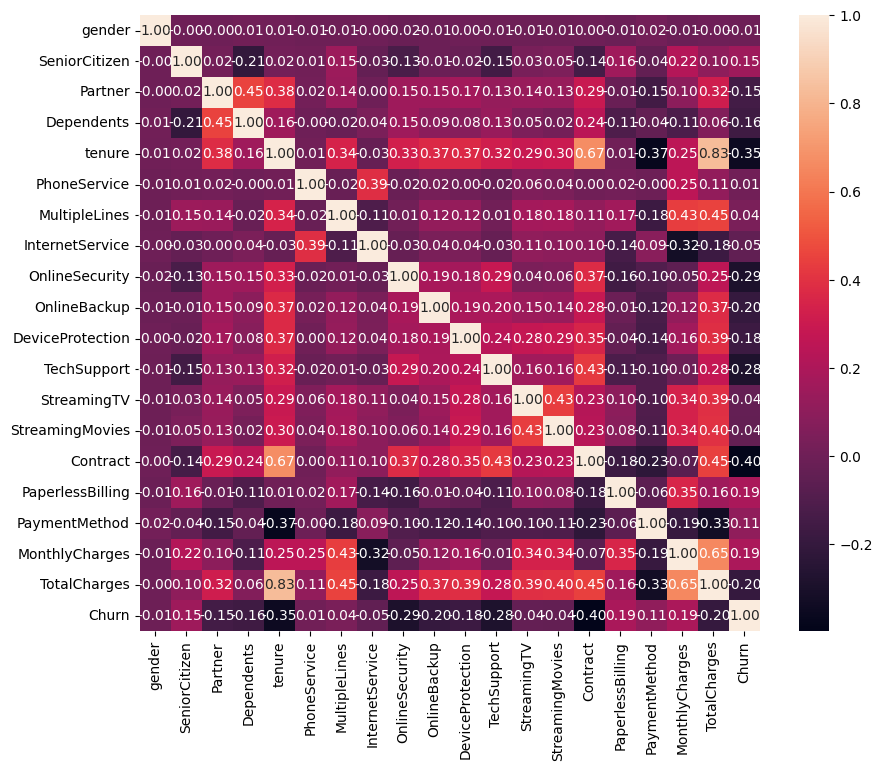

In [95]:
#Πρώτα θα ελέγξω τη συσχέτιση μεταξύ των μεταβλητών του μοντέλου
corr_table = df.corr(method = 'pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr_table, annot=True, fmt=".2f")
plt.show

In [96]:
# πραγματοποίηση permutation importance σε validation δεδομένα
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

#εδώ δημιούργησα τα validation σύνολα των X & y που θα χρησιμοποιήσω και το permutation importance

In [97]:
# εφαρμογή SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

val_pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

val_pipe.fit(X_tr, y_tr)  #εφαρμογή SMOTE μόνο στο training split
y_val_pred = val_pipe.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       828
           1       0.58      0.58      0.58       299

    accuracy                           0.78      1127
   macro avg       0.71      0.71      0.71      1127
weighted avg       0.78      0.78      0.78      1127



In [98]:
# τελικό βήμα για permutation importance
from sklearn.inspection import permutation_importance

# έχω χωρίσει από το αρχικό training ένα μικρό validation

result = permutation_importance(
    estimator=best_rf_bayes,
    X=X_val, y=y_val,
    scoring="f1",
    n_repeats=20, random_state=42, n_jobs=-1
)

importance_df = (pd.DataFrame({
    "feature": X_val.columns,
    "mean": result["importances_mean"],
    "std": result["importances_std"]
}).sort_values(by="mean")
)

print(importance_df)

             feature      mean       std
6      MultipleLines  0.005293  0.003570
5       PhoneService  0.005353  0.002221
1      SeniorCitizen  0.006126  0.002305
12       StreamingTV  0.009318  0.004512
15  PaperlessBilling  0.010408  0.003266
13   StreamingMovies  0.011203  0.003194
0             gender  0.014541  0.005526
10  DeviceProtection  0.017756  0.005439
16     PaymentMethod  0.019069  0.005773
2            Partner  0.022014  0.004451
3         Dependents  0.026467  0.007169
9       OnlineBackup  0.026490  0.007586
18      TotalCharges  0.041601  0.005760
7    InternetService  0.043438  0.006193
11       TechSupport  0.052135  0.010842
8     OnlineSecurity  0.070354  0.010863
4             tenure  0.071779  0.009832
17    MonthlyCharges  0.100261  0.009361
14          Contract  0.124148  0.011710


In [99]:
# κόψιμο των μη σημαντικών features
to_drop = ["Multiple Lines", "StreamingTV", "SeniorCitizen"]

# drop και στα δεδομένα
X_tr_reduced = X_tr.drop(columns=to_drop, errors="ignore")
X_val_reduced = X_val.drop(columns=to_drop, errors="ignore")
X_test_reduced = X_test.drop(columns=to_drop, errors="ignore")

# νέο pipeline και fit πάνω στα νέα δεδομένα
pipe_red = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(random_state=42, n_jobs=-1))
])

pipe_red.fit(X_tr_reduced, y_tr)

# αξιολόγηση validation
y_val_pred_red = pipe_red.predict(X_val_reduced)
print("Validation F1:", f1_score(y_val, y_val_pred_red))
print("Validation Accureacy:", accuracy_score(y_val, y_val_pred_red))
print("Validation Report:\n", classification_report(y_val, y_val_pred_red))

# αξιολόγηση test
y_test_pred_red = pipe_red.predict(X_test_reduced)
print("Test Report:\n", classification_report(y_test, y_test_pred_red))

Validation F1: 0.5737976782752903
Validation Accureacy: 0.771960958296362
Validation Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       828
           1       0.57      0.58      0.57       299

    accuracy                           0.77      1127
   macro avg       0.71      0.71      0.71      1127
weighted avg       0.77      0.77      0.77      1127

Test Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.57      0.57      0.57       373

    accuracy                           0.77      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409

